In [17]:
from QAOA_simulator import QAOA_run
import networkx as nx
import qokit.maxcut as mc
import numpy as np
from matplotlib import pyplot as plt

N = int(input('N ~ '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['num_QAOA_calls'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['num_QAOA_calls'])


QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")



{'gamma': array([1.16456881, 1.92149268, 1.94586743]),
 'beta': array([0.45437931, 0.25131671, 0.18839525]),
 'state': array([-0.01779774-0.01459489j,  0.0240307 -0.0108893j ,
         0.45521517+0.09446428j,  0.31765096+0.15604065j,
         0.0187028 -0.02668825j, -0.0097792 +0.07568794j,
        -0.00768582+0.00860677j, -0.0097792 +0.07568794j,
         0.0187028 -0.02668825j, -0.0097792 +0.07568794j,
        -0.00768582+0.00860677j, -0.0097792 +0.07568794j,
         0.05309371-0.00525664j,  0.31765096+0.15604065j,
         0.04855742+0.02324087j,  0.0240307 -0.0108893j ,
         0.0240307 -0.0108893j ,  0.04855742+0.02324087j,
         0.31765096+0.15604065j,  0.05309371-0.00525664j,
        -0.0097792 +0.07568794j, -0.00768582+0.00860677j,
        -0.0097792 +0.07568794j,  0.0187028 -0.02668825j,
        -0.0097792 +0.07568794j, -0.00768582+0.00860677j,
        -0.0097792 +0.07568794j,  0.0187028 -0.02668825j,
         0.31765096+0.15604065j,  0.45521517+0.09446428j,
         0.0

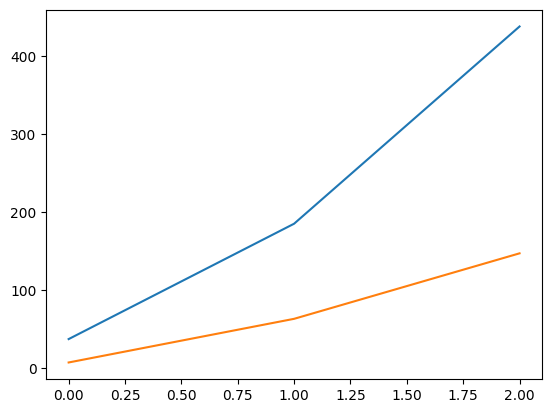

In [22]:
p_values = range(p)
#plt.scatter(p_values, qaoa_calls_bfgs)
plt.plot(p_values, qaoa_calls_cobyla)
plt.plot(p_values, qaoa_calls_bfgs)
plt.show()

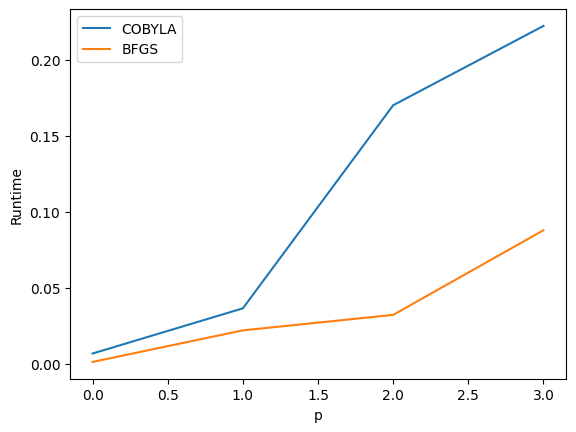

In [30]:
N = int(input('N = '))
p = int(input('p = '))
G = nx.erdos_renyi_graph(N, 0.5)  # Random graph w/ 0.5 edge probability
ising_model = mc.get_maxcut_terms(G)
init_gamma, init_beta = np.random.rand(2, p)
qaoa_calls_cobyla = []
qaoa_calls_bfgs = []
for n in range(p):
    cobyla_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "COBYLA")
    qaoa_calls_cobyla.append(cobyla_dict['runtime'])
    bfgs_dict = QAOA_run(ising_model, N, n, init_gamma, init_beta, "BFGS")
    qaoa_calls_bfgs.append(bfgs_dict['runtime'])
#QAOA_run(ising_model, N, p, init_gamma, init_beta, "COBYLA")

p_values = range(p)
fig, ax = plt.subplots()
ax.plot(p_values, qaoa_calls_cobyla, label="COBYLA") 
ax.plot(p_values, qaoa_calls_bfgs, label="BFGS")
ax.set_xlabel("p") #x軸に名前を付ける
ax.set_ylabel("Runtime") #y軸に名前を付ける
ax.legend() #グラフに名前を付ける
plt.show() #表示

#Next exercise is to add labes for x-axis and y-axis.

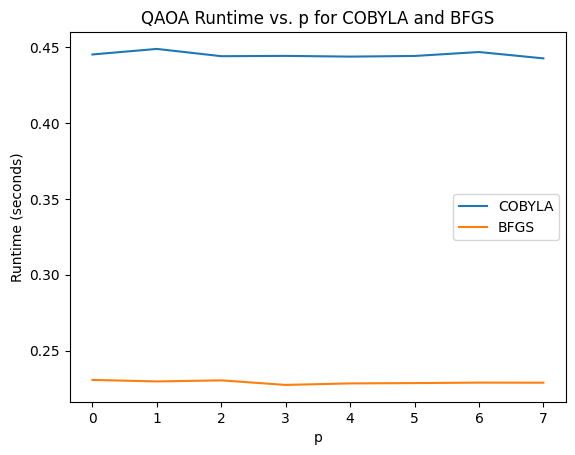

In [40]:
N = int(input('N = '))
p = int(input('p = '))
ising_model = np.array([])  # Replace with your actual Ising model
'''
ising_model = np.array([]) は、空の NumPy 配列を作成しています。
これは、Ising モデルの項を格納するためのプレースホルダーとして使用されています。
実際には、Ising モデルの具体的な項（スピン相互作用と外部磁場の項など）を格納する
ための配列を定義する必要があります。
'''
optimizer_method1 = "COBYLA"
optimizer_method2 = "BFGS"
optimizer_options = {"rhobeg": 0.01 / N}
mixer = "x"

# Initialize gamma and beta with some values
p_values = []
for n in range(p+1):
    p_values.append(n)
runtimes1 = []
runtimes2 = []

for n in p_values:
    init_gamma = np.random.rand(p)
    init_beta = np.random.rand(p)
    runtimes1.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method1, optimizer_options, mixer)["runtime"])
    runtimes2.append(QAOA_run(ising_model, N, p, init_gamma, init_beta, optimizer_method2, optimizer_options, mixer)["runtime"])

# Plotting p vs runtime
plt.plot(p_values, runtimes1, label="COBYLA")
plt.plot(p_values, runtimes2, label="BFGS")
plt.xlabel('p')
plt.ylabel('Runtime (seconds)')
plt.title('QAOA Runtime vs. p for '+optimizer_method1+" and "+optimizer_method2)
plt.legend()
plt.show()